In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

### Online Shoppers Intention Dataset

- Target Variable: Revenue.
This indicated whether a session resulted in a purchase (True or False)
- Categorical Variables: Month, VisitorType, Weekend
- Quantitative Variables: Administrative, Administrative_Duration, Informational, ProductRelated, BounceRates, ExitRates, PageValues

### Answering Questions in Project Description:

1. Which variables are predictive of the target variable?
    -  Month, VisitorType, Weekend, Administrative, Administrative_Duration, Informational, ProductRelated, BounceRates, ExitRates, PageValues are predictive of the target variable Revenue

2. Can logistic regression or a linear SVM predict well?
    - Both models can perform well on binary classification tasks. Logistic regression is straightforward and interpretable, while SVMs can handle non-linear boundaries if the data is transformed appropriately. 

3. What do plots of selected pairs of variables look like? Where is the decision boundary in those plots?
    - TBD

4. Is there a difference between the polynomial and RBF SVMs?
    - TBD

5. What effect does changing the class_weight in an SVM have on your data? How might this be important for this data?
    - TBD

6. Is there a difference in runtime performance?
    - TBD

7. Logistic regression and LinearSVC use one-vs-rest (OVR) for multi-class classification. SVC uses one-vs-one (OVO). Where n is the number of classes, OVR learns n models, whereas OVO learns n(n-1)/2 (n choose 2) models. What effect does this have on performance?
    - TBD

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
df['Revenue'] = df['Revenue'].astype(int)
y = df['Revenue']

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation of all features with 'Revenue'
revenue_correlation = correlation_matrix['Revenue'].sort_values(ascending=False)
print(revenue_correlation)

# Select features with significant correlation & standardize it
selected_features = ['PageValues', 'ExitRates', 'BounceRates']
X_selected = df[selected_features]
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


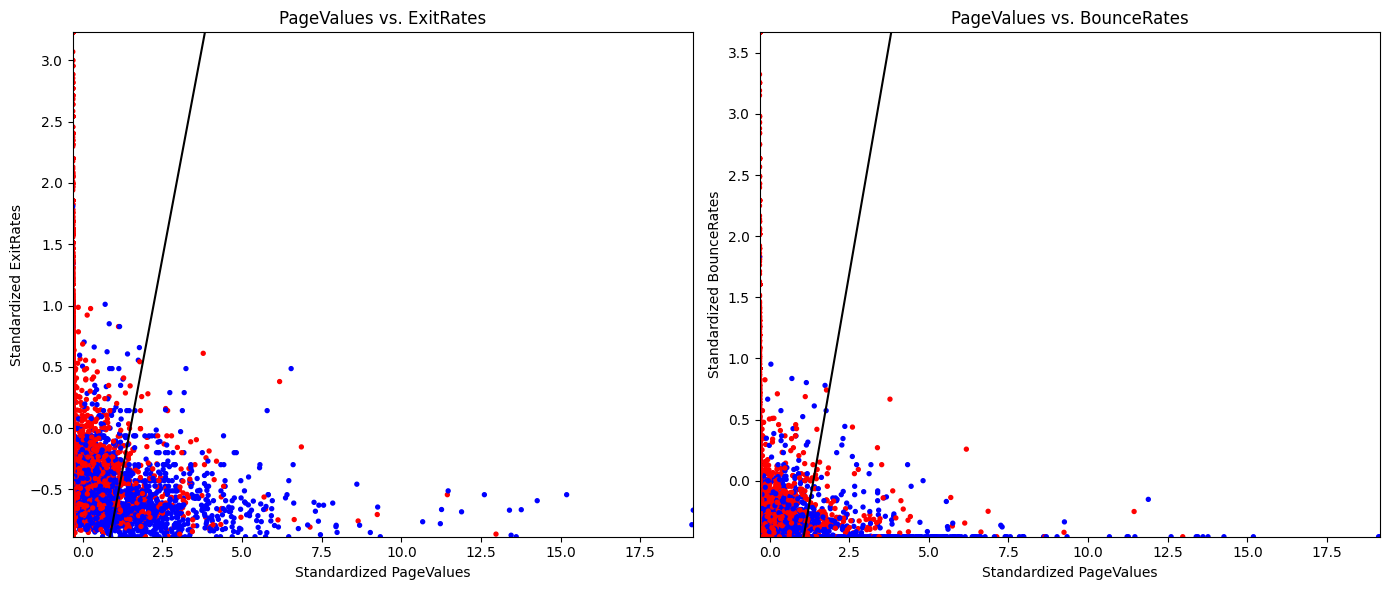

In [92]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression models for the two sets of features
model_exit_rates = LogisticRegression()
model_exit_rates.fit(X_selected_scaled[:, [0, 1]], y)

model_bounce_rates = LogisticRegression()
model_bounce_rates.fit(X_selected_scaled[:, [0, 2]], y)

# Visualization of the selected features with decision boundaries
plt.figure(figsize=(14, 6))

# Define the range for x values based on the standardized features
x_range = np.linspace(X_selected_scaled[:, 0].min(), X_selected_scaled[:, 0].max(), 200)

# calculate the decision boundary for 'ExitRates'
b0_exit_rates = model_exit_rates.intercept_[0]
b_exit_rates = model_exit_rates.coef_[0]
y_exit_rates = -(b0_exit_rates + b_exit_rates[0] * x_range) / b_exit_rates[1]

# calculate the decision boundary for 'BounceRates'
b0_bounce_rates = model_bounce_rates.intercept_[0]
b_bounce_rates = model_bounce_rates.coef_[0]
y_bounce_rates = -(b0_bounce_rates + b_bounce_rates[0] * x_range) / b_bounce_rates[1]

# define the color for the scatter plot
color = ['red' if y_ == 0 else 'blue' for y_ in y]

# plot for 'PageValues' and 'ExitRates'
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(X_selected_scaled[:, 0], X_selected_scaled[:, 1], c=color, s=8)
ax1.plot(x_range, y_exit_rates, color='black')
ax1.set_xlim(X_selected_scaled[:, 0].min(), X_selected_scaled[:, 0].max())
ax1.set_ylim(X_selected_scaled[:, 1].min(), X_selected_scaled[:, 1].max())
ax1.set_xlabel('Standardized PageValues')
ax1.set_ylabel('Standardized ExitRates')
ax1.set_title('PageValues vs. ExitRates')

# plot for 'PageValues' and 'BounceRates'
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X_selected_scaled[:, 0], X_selected_scaled[:, 2], c=color, s=8)
ax2.plot(x_range, y_bounce_rates, color='black')
ax2.set_xlim(X_selected_scaled[:, 0].min(), X_selected_scaled[:, 0].max())
ax2.set_ylim(X_selected_scaled[:, 2].min(), X_selected_scaled[:, 2].max())
ax2.set_xlabel('Standardized PageValues')
ax2.set_ylabel('Standardized BounceRates')
ax2.set_title('PageValues vs. BounceRates')

plt.tight_layout()
plt.show()


In [93]:
# make predictions and calculate performance metrics for 'ExitRates'
y_pred_exit_rates = model_exit_rates.predict(X_exit_rates_scaled)
p_exit_rates, r_exit_rates, f_exit_rates, _ = precision_recall_fscore_support(y, y_pred_exit_rates, labels=[1, 0])

# make predictions and calculate performance metrics for 'BounceRates'
y_pred_bounce_rates = model_bounce_rates.predict(X_bounce_rates_scaled)
p_bounce_rates, r_bounce_rates, f_bounce_rates, _ = precision_recall_fscore_support(y, y_pred_bounce_rates, labels=[1, 0])

print('Metrics for PageValues vs. ExitRates:')
print('Predicted range: [{:.2f},{:.2f}]'.format(min(y_pred_exit_rates), max(y_pred_exit_rates)))
print('Precision:', p_exit_rates)
print('Recall:', r_exit_rates)
print('F-score:', f_exit_rates)

print('\nMetrics for PageValues vs. BounceRates:')
print('Predicted range: [{:.2f},{:.2f}]'.format(min(y_pred_bounce_rates), max(y_pred_bounce_rates)))
print('Precision:', p_bounce_rates)
print('Recall:', r_bounce_rates)
print('F-score:', f_bounce_rates)

Metrics for PageValues vs. ExitRates:
Predicted range: [0.00,1.00]
Precision: [0.76555556 0.89335083]
Recall: [0.36111111 0.97975437]
F-score: [0.49074074 0.93455977]

Metrics for PageValues vs. BounceRates:
Predicted range: [0.00,1.00]
Precision: [0.76391982 0.89310707]
Recall: [0.35953878 0.97965841]
F-score: [0.48895225 0.93438272]
